# **<span style='color:orange'>Preprocesamiento</span>**

### Vamos a realizar el análisis estadístico exploratorio y el preprocesamiento de los datos. La idea es conocer mejor los datos, limpiarlos y preparlos para el uso de los algoritmos de Machine Learning en la proxima étapa

#### Exploración estadística 

In [1]:
#Importamos las herramientas necesarias

import numpy as np # funciones matemáticas
import pandas as pd # herramientas de analisis de datos
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder #herrmaienta para convertir a valores enteros
from sklearn.preprocessing import OneHotEncoder #herramienta para binarizar variables
import seaborn as sns # Visualization
import matplotlib.pyplot as plt

In [2]:
#importamos los datos y los leemos con la función pd.read_excel.
#De ahora en adelante cada vez que declaremos df estaremos haciendo referencia a nuestros datos

df = pd.read_excel("./DATA/fragmentos.xlsx",sheet_name='dset', engine='openpyxl')


In [3]:
df.info() #información básica  sobre el dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Coccion             578 non-null    object
 1   T_desgrasante       578 non-null    object
 2   Composicion         578 non-null    object
 3   Densidad            578 non-null    object
 4   Textura             578 non-null    object
 5   Grosor₍mm)          578 non-null    int64 
 6   Tamaño(cm)          578 non-null    int64 
 7   Acabado_Interno     578 non-null    object
 8   Acabado_Externo     578 non-null    object
 9   Dureza              578 non-null    object
 10  Color_Munsell       578 non-null    object
 11  Ahumado             578 non-null    object
 12  Decoracion          578 non-null    object
 13  Tecnica             578 non-null    object
 14  Elemento₁           578 non-null    object
 15  Localizacion        578 non-null    object
 16  Baño                578 no

Exploremos la información que el comando **df.info()** nos brinda:

* Tenemos 578 entradas que corresponden al número de fragmentos númerados en un indice del 0 al 577
* Tenemos un total de 22 columnas (numeradas de 0 a 21) que representan cada una de las caracteristicas con las que describimos los fragmentos.
* En esta tabla resúmen, la columna Non-Null count nos informa sobre el número de valores faltantes en cada columna. Como observamos no tenemos valores faltantes en nuestros datos. 
* La columna Dtype nos informa sobre el tipo de datos que contiene nuestra matriz, el tipo **int64** corresponde a  vaiables numéricas mientras que **object** se refiere a variables categóricas. Como podemos observar la nuestra es una **matriz de datos mixta** con 19 variables categóricas y 2 numéricas

**El siguiente paso es convertir las columnas categóricas en numéricas y simplificar tanto como sea posible nuestro espacio predictor, es decir eliminar las columnas que no son realmente importantes para la clasificación cerámica**

Exploremos un momento la variable decoración:

In [4]:
#df['Elemento'].value_counts()
df['Decoracion'].value_counts()

Ausente     557
Presente     21
Name: Decoracion, dtype: int64

In [5]:
 (df['Decoracion'].value_counts()['Ausente'] / df.shape[0]) * 100

96.36678200692042

**557** fragmentos, es decir el **96,36%** de los fragmentos no tienen ninguna decoración, por lo tanto no es posible utilizar las variables decorativas en nuestro problema debido a que no tenemos datos suficientes para considerar su información representativa.
Tampoco vamos a utilizar las variables relativas al color porque queremos reducir al maximo posible los sesgos producto de la percepción de los analístas. El color es muy susceptible de ser percibido de forma diferente por diferentes personas asi que eliminaremos toda la información relativa al color de los fragmentos

In [6]:
#eliminamos algunas columnas que no usaremos en nuestro ejercicio
df = df.drop(['Color_Eng _o_baño2', 'Color_Baño', 'Color_Engobe', 'Color_Munsell', 'Decoracion',
             'Tecnica', 'Elemento₁', 'Localizacion' ], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Coccion          578 non-null    object
 1   T_desgrasante    578 non-null    object
 2   Composicion      578 non-null    object
 3   Densidad         578 non-null    object
 4   Textura          578 non-null    object
 5   Grosor₍mm)       578 non-null    int64 
 6   Tamaño(cm)       578 non-null    int64 
 7   Acabado_Interno  578 non-null    object
 8   Acabado_Externo  578 non-null    object
 9   Dureza           578 non-null    object
 10  Ahumado          578 non-null    object
 11  Baño             578 non-null    object
 12  Engobe           578 non-null    object
dtypes: int64(2), object(11)
memory usage: 58.8+ KB


Ya tenemos un primer filtro de nuestra matriz de datos. **El proximo paso es convertir las columnas categóricas en numéricas**

Para esto vamos a separar separar las variables numéricas de aquellas ordinales y nominales para aplicar diferentes procedimientos.

**```Recordemos que las variables ordinales tienen una relación de orden mientras que las nominales solo describen la presencia o ausencia de una caracteristica```**


In [7]:
datos_numericos = df.select_dtypes(include=[np.number])
datos_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Grosor₍mm)  578 non-null    int64
 1   Tamaño(cm)  578 non-null    int64
dtypes: int64(2)
memory usage: 9.2 KB


In [8]:
ordinales = ['T_desgrasante', 'Densidad', 'Acabado_Interno', 'Acabado_Externo',
               'Dureza'] #seleccionamos las variables ordinales y las agrupamos en una nueva tabla

nominales = df.columns.difference(ordinales) # Hacemos lo mismo con las nominales

variables_ordinales = df[ordinales]
variables_nominales = df[nominales].drop(['Grosor₍mm)','Tamaño(cm)'], axis=1)        
variables_ordinales.info()
variables_nominales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   T_desgrasante    578 non-null    object
 1   Densidad         578 non-null    object
 2   Acabado_Interno  578 non-null    object
 3   Acabado_Externo  578 non-null    object
 4   Dureza           578 non-null    object
dtypes: object(5)
memory usage: 22.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ahumado      578 non-null    object
 1   Baño         578 non-null    object
 2   Coccion      578 non-null    object
 3   Composicion  578 non-null    object
 4   Engobe       578 non-null    object
 5   Textura      578 non-null    object
dtypes: object(6)
memory usage: 27.2+ KB


In [9]:
variables_nominales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ahumado      578 non-null    object
 1   Baño         578 non-null    object
 2   Coccion      578 non-null    object
 3   Composicion  578 non-null    object
 4   Engobe       578 non-null    object
 5   Textura      578 non-null    object
dtypes: object(6)
memory usage: 27.2+ KB


In [10]:
#Establecemos el orden en que queremos que nuestras variables sean transformadas
orden_T_desgrasante = ['Muy  fino', 'Fino', 'Medio', 'Grueso']
orden_Densidad = ['Equilibrado', 'Mas desgrasante']
orden_Acabado_Interno = ['Burdo', 'Erosionado','Fino','Pulido']
orden_Acabado_Externo = ['Burdo', 'Erosionado', 'Fino', 'Pulido']
orden_Dureza = ['Raya con la uña', 'Dura', 'Muy dura']

    
categories = [orden_T_desgrasante , orden_Densidad, orden_Acabado_Interno,
orden_Acabado_Externo, orden_Dureza ]
              

In [11]:

enc = OrdinalEncoder(dtype= 'int64', categories = categories) #estamos usando una de las herramientas importadas en el primer paso

enc.fit_transform(variables_ordinales)
variables_ordinales_codificadas = pd.DataFrame(enc.fit_transform(variables_ordinales),columns= variables_ordinales.columns)
variables_ordinales_codificadas # nuestra tabla transformada a enteros 


,T_desgrasante,Densidad,Acabado_Interno,Acabado_Externo,Dureza
0,2,1,2,2,0
1,2,0,2,2,0
2,2,0,2,2,0
3,2,1,1,1,1
4,1,0,1,2,0
...,...,...,...,...,...
573,1,0,1,2,0
574,1,0,1,1,0
575,1,0,2,2,0
576,1,0,2,2,1


In [12]:
encoding = enc.categories_
encoding_feature = lambda variables_ordinales_codificadas: dict(zip(variables_ordinales_codificadas,
                                                           range(len(variables_ordinales_codificadas))))
encoding_full = [encoding_feature(feature_elem) for feature_elem in encoding ]
print(encoding_full)

[{'Muy  fino': 0, 'Fino': 1, 'Medio': 2, 'Grueso': 3}, {'Equilibrado': 0, 'Mas desgrasante': 1}, {'Burdo': 0, 'Erosionado': 1, 'Fino': 2, 'Pulido': 3}, {'Burdo': 0, 'Erosionado': 1, 'Fino': 2, 'Pulido': 3}, {'Raya con la uña': 0, 'Dura': 1, 'Muy dura': 2}]


Hemos transformado nuestra tabla de variables ordinales en categorias representadas como número enteros. 

Ahora vamos a tranformar las variables nominales usando una técnica de binarización que convertirá cada variable en un conjunto de variables de 0 para indicar ausencia y 1 para indicar presencia

In [13]:
binario= OneHotEncoder(dtype= 'int64')
variables_binarizadas = binario.fit_transform(variables_nominales).toarray()
variables_nominales_codificadas = pd.DataFrame(variables_binarizadas, columns=binario.get_feature_names_out())
#variables_nominales_codificadas # nuestra tabla transformada  
variables_nominales_codificadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 23 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   Ahumado_Ambas                                            578 non-null    int64
 1   Ahumado_Externo                                          578 non-null    int64
 2   Ahumado_Interno                                          578 non-null    int64
 3   Ahumado_No                                               578 non-null    int64
 4   Baño_Ambas                                               578 non-null    int64
 5   Baño_Externo                                             578 non-null    int64
 6   Baño_Interno                                             578 non-null    int64
 7   Baño_No                                                  578 non-null    int64
 8   Baño_ambas                                        

Tenemos una nueva columna por cada valor de nuestras variables nominales originales.
Ahora solo nos queda juntar todo el dataset de nuevo.


In [21]:
datos_transformados = pd.concat([variables_nominales_codificadas, variables_ordinales_codificadas,datos_numericos], axis=1)  

In [22]:
datos_transformados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 30 columns):
 #   Column                                                   Non-Null Count  Dtype
---  ------                                                   --------------  -----
 0   Ahumado_Ambas                                            578 non-null    int64
 1   Ahumado_Externo                                          578 non-null    int64
 2   Ahumado_Interno                                          578 non-null    int64
 3   Ahumado_No                                               578 non-null    int64
 4   Baño_Ambas                                               578 non-null    int64
 5   Baño_Externo                                             578 non-null    int64
 6   Baño_Interno                                             578 non-null    int64
 7   Baño_No                                                  578 non-null    int64
 8   Baño_ambas                                        

### Métodos para explorar la correlación y multicolinearidad entre las variables

Una vez eliminadas las columnas que **sabemos** que no nos sirven, vamos a usar dos procedimientos diferentes para intentar simplificar aún más nuestro problema

* [Matrices de correlación](https://es.wikipedia.org/wiki/Matriz_de_correlaci%C3%B3n)
* [Factor de inflación de la varianza](https://es.wikipedia.org/wiki/Factor_de_inflaci%C3%B3n_de_la_varianza)

Las matrices de correlación permiten una inspección visual intuitiva del comportamiento de las variables, veamos:

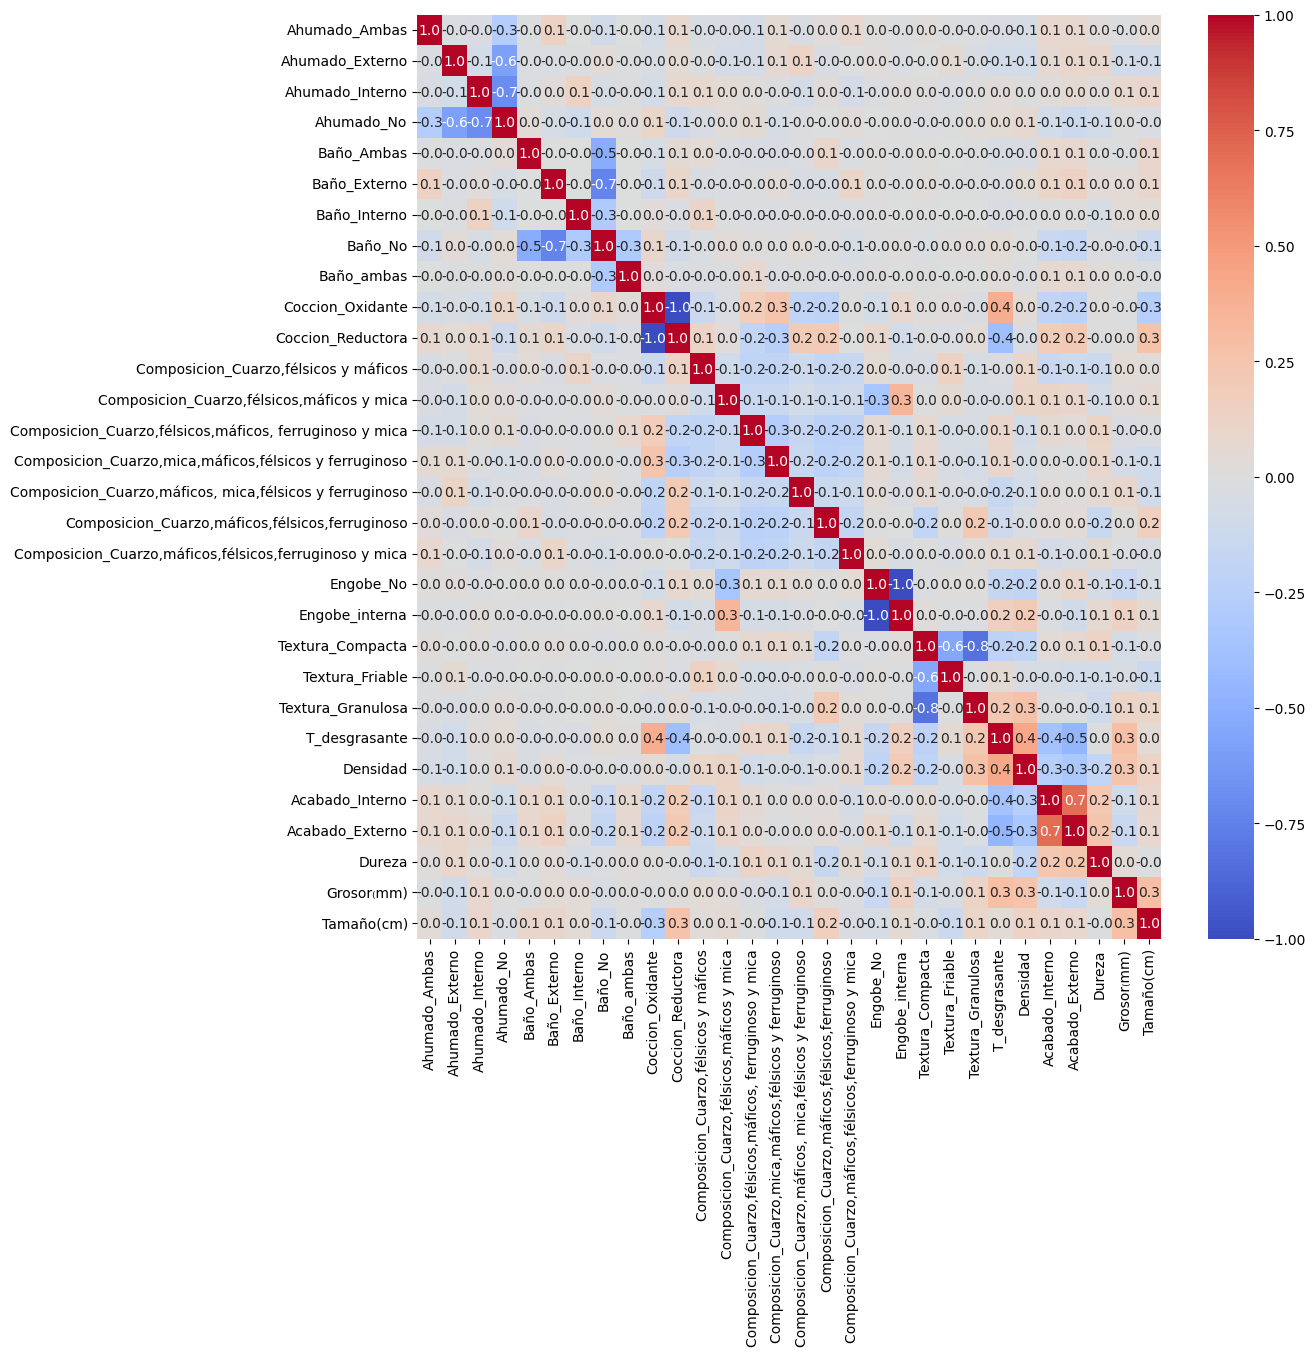

In [28]:
#Matrices de correlación
fig, ax = plt.subplots(figsize=(12, 12))
correlation_matrix = datos_transformados.corr(method='spearman') #Mediante el parametro method= se puede escoger entre varios
                                                #coeficientes de correlación {‘pearson’,
                                                #‘kendall’, ‘spearman’}

sns_plot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".1f") 
fig = sns_plot.get_figure()
#fig.savefig("./Un-modelo-de-juguete/figures/correlation.png", bbox_inches='tight')
plt.show()

Nos interesa fijarnos en aquellas relaciones más extremas entre las variables. Aquellas que se comportan de manera similar decimos que tienen una alta correlación positiva y quiere decir que valores altos en una variable estan acompañados de valores altos en la otra, estan representados por un color rojo intenso. 
Observemos  la relación entre las variables 'Elemento₁', 'Localizacion', y 'Tecnica' que conforman ese recuadro rojo con valores altos que vemos

* Los desgrasantes gruesos se relacionan con fragmentos que presentan coccion oxidante y lo opuesto para la atmosfera reductora
* Fragementos con mas densidad de desgrasante se relacionan con desgrasantes mas gruesos
* Fragmentos con mas densidad de desgrasante se relacionan con una textura granulosa
* Los fragmentos que presentan un engobe interno se relacionan con ua combinacion particular de materias primas que componen el desgrasante
* Una composicion particular del desgrasante esta relacionada con una atmosfera de coccion oxidante
* El grosor de los fragmentos esta altamente correlacionado con la densidad y el tamaño del desgrasante
* El grosor y el tamaño estan altamente correlacionados

In [29]:
# Vamos a construir una función para calcular el Factor de inflación de la varianza (VIF)

def calc_vif(df):
    # Calculando el VIF
    vif = pd.DataFrame() # creamos la tabla para visualizar los resultados
    vif["variables"] = df.columns # la columna 'variables' va a tener el nombre de las columnas de nuestra matriz
    vif["VIF"] = [variance_inflation_factor(df.values, i) 
                  for i in range(df.shape[1])] # calculamos el VIF para cada columna

    return(vif)

La intuición detras del computo del VIF es la eliminación de aquellas variables con puntajes muy altos, particularmente valores >= 10 indican una alta [multicolinealidad](https://es.wikipedia.org/wiki/Multicolinealidad).

Este es un ejercicio iterativo, es decir, Calculamos el VIF, eliminamos aquellas columans con el mayor valor y volvemos a calcular...

**[aqui](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/) un recurso útil para entender el funcionamiento de este método**

In [30]:
# Aplicamos la función que creamos sobre nuestros datos df
calc_vif(datos_transformados)

/home/dsg/.local/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Ahumado_Ambas,inf
1,Ahumado_Externo,inf
2,Ahumado_Interno,inf
3,Ahumado_No,inf
4,Baño_Ambas,inf
5,Baño_Externo,inf
6,Baño_Interno,inf
7,Baño_No,inf
8,Baño_ambas,inf
9,Coccion_Oxidante,inf


In [ ]:
df= df.drop(['Acabado_Externo', 'Acabado_Interno', 'Tamaño(cm)'], axis=1)
calc_vif(df)

In [ ]:
#Matrices de correlación

correlation_matrix = df.corr(method='spearman') #Mediante el parametro method= se puede escoger entre varios
                                                #coeficientes de correlación {‘pearson’,
                                                #‘kendall’, ‘spearman’}

sns_plot = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".1f") 
fig = sns_plot.get_figure()
#fig.savefig("/home/dsg/Escritorio/CCA2024/figures/correlation.png", bbox_inches='tight')
plt.show()

Los mapas de calor permiten la inspección visual de variables altamente correlacionadas.
Su exclusión del conjunto de datos debe estar justificada en términos del objetivo

In [ ]:
#df.to_csv('./intermediate_data/datos_preprocesados.csv')


Una vez los datos estan preprocesados, podemos realizar la [Fase No-Supervisada](./CCA_Clustering.ipynb)